# Project Title: Predictive Maintenance in the oil and Gas Industry using Machine Learning

# Objectives

1. Early Fault Detection: Develop a predictive model that can detect potential equipment failures well in advance, allowing for timely maintenance interventions.

2. Optimize Maintenance Schedules: Utilize historical data and real-time monitoring to create optimized maintenance schedules, reducing unnecessary downtime and increasing asset utilization.

3. Cost Reduction: Minimize the costs associated with unscheduled downtime, emergency repairs, and spare parts inventory through targeted and efficient maintenance.

4. Safety Enhancement: Improve workplace safety by identifying and rectifying potential safety hazards before they escalate into critical situations.

5. Data Integration and Visualization: Implement a comprehensive data infrastructure to seamlessly collect, integrate, and visualize data from various sources, including sensors, historical records, and maintenance logs.

# Sensors that can monitor various aspects of the equipment and processes

- Vibration Sensors:
    - Used to detect abnormal vibrations in rotating machinery like pumps, compressors, and turbines.

- Temperature Sensors:
    - Monitor the temperature of equipment and processes to detect overheating or abnormal temperature fluctuations.

- Pressure Sensors:
    - Measure pressure levels in pipelines, vessels, and other equipment to detect abnormalities or leaks.

- Gas Sensors (for Toxic or Combustible Gases):
    - Detect the presence of potentially hazardous gases in the environment, helping to ensure worker safety and prevent equipment damage.

- Sound or Acoustic Sensors:
    - Used to detect unusual sounds or patterns in machinery that could indicate a potential issue.

- Humidity Sensors:
Monitor humidity levels, particularly in environments where moisture could be detrimental to equipment.

# Methodology
1. Data Collection and Preprocessing:
  - Task: Gather historical data on equipment performance, maintenance records, and environmental conditions from the oil and gas facilities.
  - Approach:
Collaborate with the facilities to access and extract relevant data.
Clean and preprocess the data to handle missing values, outliers, and inconsistencies.
Normalize and standardize the data to ensure uniformity.
2. Feature Engineering:
  - Task: Identify relevant features and engineer additional ones that can be used to predict equipment failure.
  - Approach:
Conduct exploratory data analysis (EDA) to gain insights into feature importance.
Engineer features such as rolling averages, trend indicators, and statistical aggregates.
Use domain knowledge to select features that are most likely to be predictive.
3. Model Selection:
  - Task: Evaluate and select appropriate machine learning algorithms for predictive maintenance.
  - Approach:
Consider techniques like regression, classification, time series analysis, and ensemble methods.
Perform comparative analysis and validation to determine the best-performing models.
4. Model Training and Validation:
  - Task: Split the data into training and validation sets, and train the selected models.
  - Approach:
Utilize techniques like k-fold cross-validation to assess model performance.
Fine-tune hyperparameters and validate against a holdout set.
5. Anomaly Detection:
  - Task: Develop algorithms for detecting anomalies or unusual behavior in the equipment.
  - Approach:
Utilize statistical methods (e.g., z-scores, Mahalanobis distance) and machine learning techniques (e.g., Isolation Forest, One-Class SVM) for anomaly detection.
Continuously update the anomaly detection model based on feedback from real-world performance.
6. Integration with IoT Sensors:
  - Task: Implement a real-time data ingestion system that integrates with IoT sensors on the equipment.
  - Approach:
Set up communication protocols (e.g., MQTT, HTTP) for data transmission from sensors to the central system.
Develop data processing pipelines to handle real-time streams and update the predictive model.
7. Alerting System:
  - Task: Create an alerting system that notifies maintenance personnel when an impending failure is predicted.
  - Approach:
Define thresholds and criteria for triggering alerts based on model outputs.
Implement notification mechanisms (e.g., emails, SMS, dashboard alerts) for timely communication.
8. Performance Monitoring and Evaluation:
  - Task: Implement metrics to monitor the performance of the predictive maintenance system.
  - Approach:
Track metrics such as precision, recall, false positives, false negatives, and Mean Absolute Error (MAE).
Set up automated reporting and visualization for easy monitoring.
9. Continuous Improvement and Maintenance:
  - Task: Continuously update and retrain the model to adapt to changing conditions.
  - Approach:
Establish a schedule for retraining the model based on the frequency of data updates.
Monitor model drift and re-evaluate feature importance periodically.
10. Documentation and Knowledge Transfer:
  - Task: Document the entire process, including data preprocessing steps, model architecture, and implementation details.
  - Approach:
Create comprehensive documentation for easy maintenance and future scalability.
Conduct knowledge transfer sessions with relevant stakeholders.

# Expected Outcomes:
- A predictive maintenance system capable of forecasting equipment failures with a high degree of accuracy.
- Reduction in unplanned downtime and associated costs.
- Improved safety and operational efficiency in the oil and gas facilities.

In [1]:
print("importing libraries")

importing libraries


In [2]:
import pyforest
#from pydantic_settings import BaseSettings
import pandas as pd
#import ydata_profiling
#from datacleaner import autoclean
#from fasteda import fast_eda

# Loading Vibration Datasets

Below are the measurements taken at every 4096 times. D represents the training dataset taken between 630rom - 2330rpm.  E stands as the evaluation dataset taken between the range of 1060 rpm to 1900 rpm. for this project i used 4D and 4E dataset, the remain dataset are deleted to save space on my Google drive.
- 0D.csv	- 1D.csv	- 2D.csv	- 3D.csv	- 4D.csv
- 0E.csv	- 1E.csv	- 2E.csv	- 3E.csv	- 4E.csv Vibration dataset

#### Overview of the dataset components:
| ID	 |	Radius [mm]  | Mass [g] |
|--------|---------------|----------|
| 0D/ 0E | -		     | -        |
| 1D/ 1E | 14		     | 3.281    |
| 2D/ 2E | 18.5	         | 3.281    |
| 3D/ 3E | 23		     | 3.281    |
| 4D/ 4E | 23		     | 6.614    |




In [3]:
unbalanced_data = pd.read_csv("dataset/4D.csv")

In [4]:
unbalanced_data.head(5)

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
0,0.0,28.610235,0.0,0.0,0.0
1,0.0,28.610235,0.0,0.0,0.0
2,0.0,28.610235,0.0,0.0,0.0
3,0.0,28.610235,0.0,0.0,0.0
4,0.0,28.610235,0.0,0.0,0.0


In [5]:
unbalanced_data.tail(5)

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
26390522,10.0,2345.5826,0.000731,0.000556,0.002582
26390523,10.0,2345.5826,0.000464,0.000919,0.002811
26390524,10.0,2345.5826,0.000308,0.001302,0.002761
26390525,10.0,2345.5826,0.000579,0.001538,0.002979
26390526,10.0,2345.5826,0.000370,0.001889,0.003142


In [6]:
unbalanced_data.shape

(26390527, 5)

In [7]:
unbalanced_data.describe()

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3
count,2.639053e+07,2.639053e+07,2.639053e+07,2.639053e+07,2.639053e+07
mean,5.997206e+00,-3.576920e+04,1.139313e-03,2.412792e-03,3.749252e-03
std,2.326852e+00,2.989759e+06,4.087136e-02,8.043873e-02,3.956148e-02
min,0.000000e+00,-2.400000e+08,-1.271856e-01,-2.047277e-01,-4.108310e-02
25%,4.000000e+00,1.052290e+03,-3.775358e-03,-4.433393e-03,4.947185e-04
50%,6.000000e+00,1.477250e+03,6.437302e-04,6.008148e-04,3.159046e-03
75%,8.000000e+00,1.905881e+03,5.478859e-03,5.640984e-03,5.917549e-03
max,1.000000e+01,3.830562e+03,6.833680e+00,8.469567e+00,6.548744e+00


## Because the the mass and the radius of the shaft determines the vibration of the machine, i computed the product of radius and mass along with the RPM column to generates the label.

In [8]:
mass = 6.6
radius = 23

In [9]:
k = mass * radius


In [10]:
unbalanced_data['force']= unbalanced_data['Measured_RPM']*k

In [11]:
unbalanced_data

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3,force
0,0.0,28.610235,0.000000,0.000000,0.000000,4343.033673
1,0.0,28.610235,0.000000,0.000000,0.000000,4343.033673
2,0.0,28.610235,0.000000,0.000000,0.000000,4343.033673
3,0.0,28.610235,0.000000,0.000000,0.000000,4343.033673
4,0.0,28.610235,0.000000,0.000000,0.000000,4343.033673
...,...,...,...,...,...,...
26390522,10.0,2345.582600,0.000731,0.000556,0.002582,356059.438680
26390523,10.0,2345.582600,0.000464,0.000919,0.002811,356059.438680
26390524,10.0,2345.582600,0.000308,0.001302,0.002761,356059.438680
26390525,10.0,2345.582600,0.000579,0.001538,0.002979,356059.438680


In [12]:
unbalanced_data.isna().sum()

V_in            0
Measured_RPM    0
Vibration_1     0
Vibration_2     0
Vibration_3     0
force           0
dtype: int64

In [13]:
unbalanced_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26390527 entries, 0 to 26390526
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   V_in          float64
 1   Measured_RPM  float64
 2   Vibration_1   float64
 3   Vibration_2   float64
 4   Vibration_3   float64
 5   force         float64
dtypes: float64(6)
memory usage: 1.2 GB


In [14]:
vibration_data = unbalanced_data.copy()

### It has been a huge challenge to see sensor datasets for predictive maintenance, for the purpose of time, I will use this dataset I came across on Kaggle on a predictive maintenance project. Even though this dataset does not result in the desired outcome, it will give me an idea of what the real dataset would have given me.

In [15]:
# Loading next Gas Sensor

gas_data = pd.read_csv('dataset/gas sensor/AirQuality.csv', sep=';')

In [16]:
gas_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [18]:
gas_data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

In [19]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [20]:
# Columns with object data types floats with with comma sign instead of period. this is converted to floats data types

import pandas as pd

def replace_comma_with_period_in_columns(df, columns):
    for column in columns:
        df[column] = df[column].str.replace(',', '.', regex=False)
    return df

comma_col = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']

gas_data = replace_comma_with_period_in_columns(gas_data, comma_col)
for i in comma_col:
    gas_data[i] = pd.to_numeric(gas_data[i], errors='coerce')


In [21]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [22]:
# Convert date object to date time 

gas_data['Date'] = pd.to_datetime(gas_data['Date'],dayfirst=True) 

gas_data['Time'] = pd.to_datetime(gas_data['Time'],format= '%H.%M.%S' ).dt.time

gas_data

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
gas_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   float64       
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [24]:
gas_data.isna().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [25]:
cleaned_data = gas_data.dropna()

In [26]:
cleaned_data.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [27]:
cleaned_data.drop(['Date', 'Time'], axis=1, inplace=True)

/tmp/ipykernel_310801/3073529380.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop(['Date', 'Time'], axis=1, inplace=True)


In [28]:
cleaned_data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


In [29]:
# i will drop NMHC(GT) column. this is because it has almost same values
cleaned_data.drop('NMHC(GT)', axis=1, inplace=True)

/tmp/ipykernel_310801/3724618247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.drop('NMHC(GT)', axis=1, inplace=True)


In [30]:
cleaned_data.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.990061,1.865683,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,9.778305,39.485380,-6.837604
std,77.657170,329.832710,41.380206,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,43.203623,51.216145,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,4.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,10.900000,34.100000,0.692300
50%,1.500000,1053.000000,7.900000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,17.200000,48.600000,0.976800
75%,2.600000,1221.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


This dataset needs label to identify the presence of gas whenever there is one or more. Therefore i set a threshold to using the std and and mean of the datatset

In [31]:
# Set thresholds as mean + one standard deviation
thresholds = cleaned_data.mean() + cleaned_data.std()

# Apply thresholds to each column
for col in cleaned_data.columns:
    if col != 'CO(GT)':  # Skip setting threshold for 'CO(GT)'
        cleaned_data.loc[:, f'{col}_Presence'] = (cleaned_data[col] > thresholds[col]).astype(int)

# Displaying the DataFrame with labels
print(cleaned_data)

      CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0        2.6       1360.0      11.9         1046.0    166.0        1056.0   
1        2.0       1292.0       9.4          955.0    103.0        1174.0   
2        2.2       1402.0       9.0          939.0    131.0        1140.0   
3        2.2       1376.0       9.2          948.0    172.0        1092.0   
4        1.6       1272.0       6.5          836.0    131.0        1205.0   
...      ...          ...       ...            ...      ...           ...   
9352     3.1       1314.0      13.5         1101.0    472.0         539.0   
9353     2.4       1163.0      11.4         1027.0    353.0         604.0   
9354     2.4       1142.0      12.4         1063.0    293.0         603.0   
9355     2.1       1003.0       9.5          961.0    235.0         702.0   
9356     2.2       1071.0      11.9         1047.0    265.0         654.0   

      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T  ...  C6H6(GT)_Presence  \
0

/tmp/ipykernel_310801/3554213253.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.loc[:, f'{col}_Presence'] = (cleaned_data[col] > thresholds[col]).astype(int)
/tmp/ipykernel_310801/3554213253.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data.loc[:, f'{col}_Presence'] = (cleaned_data[col] > thresholds[col]).astype(int)
/tmp/ipykernel_310801/3554213253.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [32]:
airQuality_data = pd.DataFrame(cleaned_data)

### Now I have vibration sensor data named "vibration_data" and Air quality sensor data named "airQuality_data". I will be using these datasets to train predictive maintenance model for machines with rotational shaft components and also to check the air quality to prevent the escape of hazardous gas that may be harmful to employees.

In [33]:
vibration_data

,V_in,Measured_RPM,Vibration_1,Vibration_2,Vibration_3,force
0,0.0,28.610235,0.000000,0.000000,0.000000,4343.033673
1,0.0,28.610235,0.000000,0.000000,0.000000,4343.033673
2,0.0,28.610235,0.000000,0.000000,0.000000,4343.033673
3,0.0,28.610235,0.000000,0.000000,0.000000,4343.033673
4,0.0,28.610235,0.000000,0.000000,0.000000,4343.033673
...,...,...,...,...,...,...
26390522,10.0,2345.582600,0.000731,0.000556,0.002582,356059.438680
26390523,10.0,2345.582600,0.000464,0.000919,0.002811,356059.438680
26390524,10.0,2345.582600,0.000308,0.001302,0.002761,356059.438680
26390525,10.0,2345.582600,0.000579,0.001538,0.002979,356059.438680


In [34]:
airQuality_data

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,...,C6H6(GT)_Presence,PT08.S2(NMHC)_Presence,NOx(GT)_Presence,PT08.S3(NOx)_Presence,NO2(GT)_Presence,PT08.S4(NO2)_Presence,PT08.S5(O3)_Presence,T_Presence,RH_Presence,AH_Presence
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,...,0,0,0,1,0,0,0,0,0,0
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,...,0,0,0,1,0,0,0,0,0,0
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,...,0,0,0,0,0,0,0,0,0,0
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,3.1,1314.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,...,0,0,1,0,1,0,1,0,0,0
9353,2.4,1163.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,...,0,0,0,0,0,0,0,0,0,0
9354,2.4,1142.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,...,0,0,0,0,0,0,0,0,0,0
9355,2.1,1003.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,...,0,0,0,0,0,0,0,0,0,0


In [35]:
airQuality_data.iloc[:, 12:-1].sum().value_counts()

0       2
1090    1
22      1
1286    1
1267    1
1123    1
627     1
1049    1
1461    1
Name: count, dtype: int64

In [36]:
# Separating vibration dataset features and label
X_vibration, y_vibration = vibration_data.iloc[:, 0:-1], vibration_data['force']

In [37]:
# Separating Air quality dataset features and multi-class labels

X_air, y_air = airQuality_data.iloc[:, 0:12], airQuality_data.iloc[:, 12:]

In [38]:
X_vibration.shape, X_air.shape

((26390527, 5), (9357, 12))

In [39]:
# Combined dataset features from different sensors
X_data = np.hstack((X_vibration.iloc[:9357, :], X_air))
X_data.shape

<IPython.core.display.Javascript object>

(9357, 17)

In [40]:
X_data

array([[ 0.0000000e+00,  2.8610235e+01,  0.0000000e+00, ...,
         1.3600000e+01,  4.8900000e+01,  7.5780000e-01],
       [ 0.0000000e+00,  2.8610235e+01,  0.0000000e+00, ...,
         1.3300000e+01,  4.7700000e+01,  7.2550000e-01],
       [ 0.0000000e+00,  2.8610235e+01,  0.0000000e+00, ...,
         1.1900000e+01,  5.4000000e+01,  7.5020000e-01],
       ...,
       [ 0.0000000e+00, -2.4000000e+08,  3.1434298e-01, ...,
         2.6900000e+01,  1.8300000e+01,  6.4060000e-01],
       [ 0.0000000e+00, -2.4000000e+08,  3.1442761e-01, ...,
         2.8300000e+01,  1.3500000e+01,  5.1390000e-01],
       [ 0.0000000e+00, -2.4000000e+08,  3.1337023e-01, ...,
         2.8500000e+01,  1.3100000e+01,  5.0280000e-01]])

In [41]:
y_vibration.shape

(26390527,)

In [42]:
# scale vibration target variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_data_scaled = pd.DataFrame(scaler.fit_transform(X_data))
y_vibration_scaled = pd.DataFrame(scaler.fit_transform(pd.DataFrame(y_vibration)))

In [43]:
# cut the row of labels to have the same length as the features, especially the vibration labels
y_data = pd.concat([y_vibration_scaled[:9357], y_air], axis=1, ignore_index=True)

In [44]:
y_data = y_data.values

In [45]:
X_data_scaled = X_data_scaled.values

In [46]:
X_data_scaled

array([[ 0.        ,  0.37729479, -0.70278411, ...,  0.08846247,
         0.18383116,  0.19488093],
       [ 0.        ,  0.37729479, -0.70278411, ...,  0.08151824,
         0.16039979,  0.19405218],
       [ 0.        ,  0.37729479, -0.70278411, ...,  0.04911182,
         0.28341445,  0.19468593],
       ...,
       [ 0.        , -2.65044739, -0.5146541 , ...,  0.39632347,
        -0.41366862,  0.19187384],
       [ 0.        , -2.65044739, -0.51460345, ...,  0.4287299 ,
        -0.50739408,  0.188623  ],
       [ 0.        , -2.65044739, -0.51523627, ...,  0.43335938,
        -0.51520453,  0.1883382 ]])

In [47]:
y_data

array([[ 1.19734772e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.19734772e-02,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.19734772e-02,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-8.02620681e+01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.02620681e+01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.02620681e+01,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
if torch.cuda.is_available():
    device = torch.device("cuda")  # Use GPU
else:
    device = torch.device("cpu")   # Use CPU

In [49]:
# Define the neural network architecture
class MultiOutputNN(nn.Module):
    def __init__(self, input_dim, output_dims):
        super(MultiOutputNN, self).__init__()
        self.shared_hidden_layer = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU()
        )
        self.output_layers = nn.ModuleList([
            nn.Linear(64, out_dim) for out_dim in output_dims
        ])
                
    def forward(self, x):
        shared_output = self.shared_hidden_layer(x)
        print(f'shared_output shape: {shared_output.shape}')
                                    
        # Before matrix multiplication
        print(f'input shape: {x.shape}')
        
        outputs = [output_layer(shared_output) for output_layer in self.output_layers]
        for i, output in enumerate(outputs):
            print(f'output {i} shape: {output.shape}')
        return outputs

In [50]:
# Convert to tensor format that pytorch understands
X_data_tensor = torch.Tensor(X_data_scaled).to(device)
y_data_tensor = torch.Tensor(y_data).to(device)

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_data_tensor, y_data_tensor, test_size=0.3, random_state=42)

In [52]:
# Hyperparameters
from torch.optim.lr_scheduler import ReduceLROnPlateau

input_dim = X_data_tensor.shape[1]
output_dims = [1, 11]
learning_rate = 0.001
epochs = 500

In [53]:

# Initialize the model with Xavier initialiazation 
model = MultiOutputNN(input_dim, output_dims).to(device)
nn.init.xavier_uniform_(model.shared_hidden_layer[0].weight)
for layer in model.output_layers:
    nn.init.xavier_uniform_(layer.weight)

In [54]:
# Define loss functions
criterion_regression = nn.MSELoss()  # loss function for regression
criterion_classification = nn.CrossEntropyLoss() # classification loss function for air quality

In [55]:
# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Define a scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=True)

In [56]:
# Train the model

# Training loop with early stopping
best_loss = float('inf')
patience = 10
early_stop_counter = 0

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    #nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)

    # Forward pass
    outputs = model(X_train)
    
     # Calculate loss for each output
    loss = 0
    for i, output in enumerate(outputs):
        if i == 0:  # Vibration data (regression)
            loss += criterion_regression(output, y_train[:, i])
        else:  # Classification tasks
            loss += criterion_classification(output, y_train[:, i].long())
    
    # Backward and optimize
    loss.backward()
    optimizer.step()
    
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Step the scheduler
    scheduler.step(loss.item())

    # Early stopping check
    if loss.item() < best_loss:
        best_loss = loss.item()
        early_stop_counter = 0
    else:
        early_stop_counter += 1
        if early_stop_counter >= patience:
            print(f'Early stopping after {epoch+1} epochs.')
            break

shared_output shape: torch.Size([6549, 64])
input shape: torch.Size([6549, 17])
output 0 shape: torch.Size([6549, 1])
output 1 shape: torch.Size([6549, 11])
Epoch [1/500], Loss: 799.5343
shared_output shape: torch.Size([6549, 64])
input shape: torch.Size([6549, 17])
output 0 shape: torch.Size([6549, 1])
output 1 shape: torch.Size([6549, 11])


/opt/conda/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([6549])) that is different to the input size (torch.Size([6549, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [2/500], Loss: 798.6512
shared_output shape: torch.Size([6549, 64])
input shape: torch.Size([6549, 17])
output 0 shape: torch.Size([6549, 1])
output 1 shape: torch.Size([6549, 11])
Epoch [3/500], Loss: 797.7746
shared_output shape: torch.Size([6549, 64])
input shape: torch.Size([6549, 17])
output 0 shape: torch.Size([6549, 1])
output 1 shape: torch.Size([6549, 11])
Epoch [4/500], Loss: 796.9046
shared_output shape: torch.Size([6549, 64])
input shape: torch.Size([6549, 17])
output 0 shape: torch.Size([6549, 1])
output 1 shape: torch.Size([6549, 11])
Epoch [5/500], Loss: 796.0416
shared_output shape: torch.Size([6549, 64])
input shape: torch.Size([6549, 17])
output 0 shape: torch.Size([6549, 1])
output 1 shape: torch.Size([6549, 11])
Epoch [6/500], Loss: 795.1855
shared_output shape: torch.Size([6549, 64])
input shape: torch.Size([6549, 17])
output 0 shape: torch.Size([6549, 1])
output 1 shape: torch.Size([6549, 11])
Epoch [7/500], Loss: 794.3358
shared_output shape: torch.Size([65

In [57]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    # Calculate and print your evaluation metrics here

# Save the model
torch.save(model.state_dict(), 'multi_output_model.pth')

shared_output shape: torch.Size([2808, 64])
input shape: torch.Size([2808, 17])
output 0 shape: torch.Size([2808, 1])
output 1 shape: torch.Size([2808, 11])


### Regression Task (Mean Absolute Error, Mean Squared Error, R-squared)
### Classification Task (Accuracy, Precision, Confusion Matrix, F1 Score):

In [58]:
# Regression metrics
model.eval()
with torch.no_grad():
    y_pred_reg = model(X_test)[0]  # Assuming regression output is the first output ie vibration sensor
    mse = nn.functional.mse_loss(y_pred_reg, y_test[:, 0])
    rmse = torch.sqrt(mse)
    mae = torch.mean(torch.abs(y_pred_reg - y_test[:, 0]))
    r2 = 1 - (mse / torch.var(y_test[:, 0]))

    print(f'Regression Metrics:')
    print(f'Mean Absolute Error (MAE): {mae.item():.4f}')
    print(f'Mean Squared Error (MSE): {mse.item():.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse.item():.4f}')
    print(f'R-squared (R2) Score: {r2.item():.4f}')

# Classification metrics
with torch.no_grad():
    y_pred_cls = model(X_test)[1]  # Assuming classification output is the second output ie Air quality
    _, predicted = torch.max(y_pred_cls, 1)
    total = y_test.size(0)
    correct = (predicted == y_test[:, 1]).sum().item()
    accuracy = correct / total

    print(f'Classification Metrics:')
    print(f'Accuracy: {accuracy:.4f}')

    # Additional metrics
    from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

    # Precision
    precision = precision_score(y_test[:, 1], predicted)
    print(f'Precision: {precision:.4f}')

    # Recall
    recall = recall_score(y_test[:, 1], predicted)
    print(f'Recall: {recall:.4f}')

    # F1-Score
    f1 = f1_score(y_test[:, 1], predicted)
    print(f'F1-Score: {f1:.4f}')

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test[:, 1], predicted)
    print(f'Confusion Matrix:')
    print(conf_matrix)


shared_output shape: torch.Size([2808, 64])
input shape: torch.Size([2808, 17])
output 0 shape: torch.Size([2808, 1])
output 1 shape: torch.Size([2808, 11])
Regression Metrics:
Mean Absolute Error (MAE): 17.5190
Mean Squared Error (MSE): 725.0897
Root Mean Squared Error (RMSE): 26.9275
R-squared (R2) Score: -0.0016
shared_output shape: torch.Size([2808, 64])
input shape: torch.Size([2808, 17])
output 0 shape: torch.Size([2808, 1])
output 1 shape: torch.Size([2808, 11])
Classification Metrics:
Accuracy: 0.9541
Precision: 0.8376
Recall: 0.7713
F1-Score: 0.8031
Confusion Matrix:
[[2416   51]
 [  78  263]]


/tmp/ipykernel_310801/156213987.py:5: UserWarning: Using a target size (torch.Size([2808])) that is different to the input size (torch.Size([2808, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  mse = nn.functional.mse_loss(y_pred_reg, y_test[:, 0])


In [59]:
from sklearn.metrics import mean_absolute_error, r2_score

#  'test_outputs' contains the predicted values and 'y_test' contains the true values
y_true_regression = y_test[:, 0].cpu().numpy()  # Extracting the true values for regression task
y_pred_regression = test_outputs[0].cpu().numpy()  # Extracting the predicted values for regression task

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true_regression, y_pred_regression)

# Calculate R-squared (R2) score
r2 = r2_score(y_true_regression, y_pred_regression)

print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2) Score: {r2:.4f}')

Mean Absolute Error (MAE): 17.4725
R-squared (R2) Score: 0.0032


In [62]:
# Classification metrics
with torch.no_grad():
    y_pred_cls = model(X_test)[1]  # Assuming classification output is the second output
    _, predicted = torch.max(y_pred_cls, 1)

    total = y_test.size(0)
    correct = (predicted == y_test[:, 1]).sum().item()
    accuracy = correct / total

    print(f'Classification Metrics:')
    print(f'Accuracy: {accuracy:.4f}')

    # Additional metrics
    from sklearn.metrics import confusion_matrix

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test[:, 1].cpu().numpy(), predicted.cpu().numpy())
    print(f'Confusion Matrix:')
    print(conf_matrix)

shared_output shape: torch.Size([2808, 64])
input shape: torch.Size([2808, 17])
output 0 shape: torch.Size([2808, 1])
output 1 shape: torch.Size([2808, 11])
Classification Metrics:
Accuracy: 0.9541
Confusion Matrix:
[[2416   51]
 [  78  263]]


In [68]:
cleaned_data.columns[12:]

Index(['PT08.S1(CO)_Presence', 'C6H6(GT)_Presence', 'PT08.S2(NMHC)_Presence',
       'NOx(GT)_Presence', 'PT08.S3(NOx)_Presence', 'NO2(GT)_Presence',
       'PT08.S4(NO2)_Presence', 'PT08.S5(O3)_Presence', 'T_Presence',
       'RH_Presence', 'AH_Presence'],
      dtype='object')

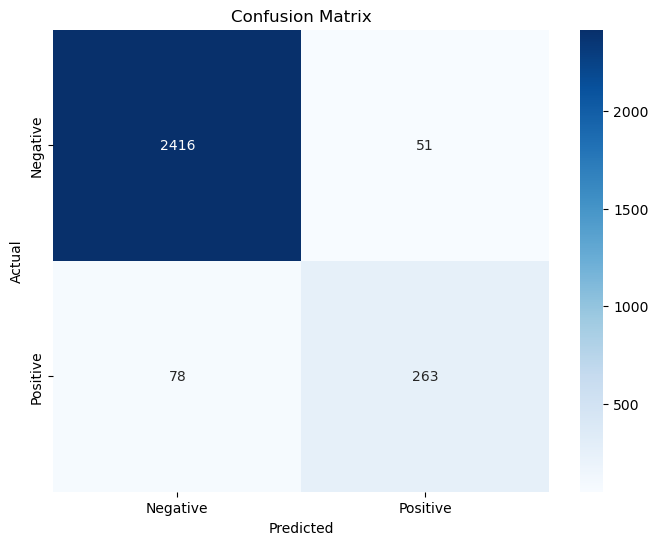

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix Values
conf_matrix = [[2416, 51],
               [78, 263]]

class_names = ['Negative', 'Positive']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
